#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.manifold import TSNE
from bokeh.io import output_notebook, show
import matplotlib.colors as mcolors
import matplotlib
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.svm import SVR
from wordcloud import WordCloud

In [2]:
#!pip install pyLDAvis==2.1.2 --user

In [3]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

In [4]:
#!pip install gensim
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

C:\Users\Administrator\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
#!pip install --upgrade ipykernel

In [7]:
#!pip install nltk
import nltk
from nltk.util import ngrams

In [8]:
#nltk.download('vader_lexicon')

#### Functions

In [9]:
def preProcessLines(lines):  
    line_index=0
    parent_line_index=0
    final_lines=[]
    cnt=0
    for line in lines:
        if re.match('Parent.*',line) :
            #print(line)
            parent_line_index=line_index 
            cnt=0
        elif re.match('Moderator.*',line) or  re.match('Moderator.*',line):
            cnt=0
        elif line_index-1==parent_line_index:
            final_lines.append(line)
            cnt=1
            #print(line)
        elif cnt==1:
            final_lines.append(line)
            #print(line)
        else:
            continue
        line_index=line_index+1   
    return final_lines

In [10]:
def preprocessText(text):
    tokens=tokenize(text)
    final_tokens = [token for token in tokens if token not in custom_stop]
    return ' '.join(word for word in final_tokens)

- Tokenize

In [11]:
def tokenize(text):
    lda_tokens=[]
    text=text.lower()
    tokens=text.split()
    for token in tokens:
        if re.match('\(silence\)',token):
            continue
        elif re.match('\[inaudible',token):
            continue
        elif re.match('\[crosstalk',token):
            continue
        elif re.match('\[Administrator',token):
            continue
        elif re.match('\d+',token):
            continue
        elif re.match('\$\d+',token):
            continue
        elif re.match('i.?m',token):
            continue
        elif re.match('you.?re',token):
            continue
        elif re.match('don.?t',token):
            continue
        elif re.match('didn.?t',token):
            continue
        elif re.match('i.?ll',token):
            continue
        elif re.match('we.?ll',token):
            continue
        elif re.match('we.?re',token):
            continue
        elif re.match('that.?s',token):
            continue
        elif re.match('can.?t',token):
            continue
        elif re.match('they.?re',token):
            continue
        elif re.match('i.?ve',token):
            continue
        elif re.match('he.?s',token):
            continue 
        elif re.match('we.?ve',token):
            continue
        elif re.match('everyone.?s',token):
            continue
        elif re.match('they.?ll',token):
            continue
        elif re.match('there.?s',token):
            continue
        elif re.match('child.?s',token):
            continue
        elif re.match('children.?s',token):
            continue
        elif re.match('she.?s',token):
            continue
        elif re.match('he.?s',token):
            continue
        elif re.match('it.?s',token):
            continue
        elif re.match('today.?s',token):
            continue
        elif re.match('does.?nt',token):
            continue
        elif re.match('you.?ve',token):
            continue
        elif re.match('would.?nt',token):
            continue
        elif re.match('here.?s',token):
            continue
        else:
            token=token.replace('?','')
            token=token.replace('.','')
            token=token.replace(':','')
            token=token.replace(',','')
            token=token.replace('/s+','')
            lda_tokens.append(token)
    return lda_tokens

- Remove stop words

In [12]:
#en_stop=set(nltk.corpus.stopwords.words('english'))
#en_stop_list=list(en_stop)
#custom_stop_list=['hi','hello','please','the','and','i','parent','child','okay','if','you','have','it','would','be','for','said','thank','you','yes','no','moderator','administrator','see','who','in','just','zoom','now','daughter','son','yeah','really','us','say','go','bit','going','things','still','think','get','got','bye','saw','noticing','there','go','think','also','take', 'way','yeah','anything', 'you','could','bye','saw','noticing','now','tell','getting','sounds','actually','know','time','definitely','call','me','even','really','us','get','got','me','able','told','guessing','guess','like','said','let','thanks','thank','something','question','conversation','joined','used','use','later','lot','talk','point','day','place','sure','minutes','early','anyone','started','front','kids','attached','parents','one','two','little','everyone','looking','full','put','using','last','end','afternoon','starting','ways','way','always','right','seems','much','there','maybe','another','sorry','guys','literally','either','else','seen','taken','sharing','understand','pandemic','today','basically','year','want','card','fact','start','join','took','says','gave','taking','mean','recording','meeting','may','saying','every','june']
custom_stop_list=['hi','hello','they','to','want','please','that','or','and','can','his','have','has','had','having','looking','look','her','him','how','doing','done','he','myself','our','while','mean','meaning','my','than','from','other','your','these','some','was','when','when','why','what','their','them','there','this','on','as','of','we','with','because','do','at','had','but','them','are','is','the','more','so','remove','removed','and','he','she','does','i','it','parent','world','going','bleep','get','got','google','googling','held','happening','happen','reach','nobody','still','getting','any','ask','asks','know','think','need','take','go','give','gave','child','pen','children','okay','may','if','you','have','it','would','be','for','said','thank','you','yes','no','moderator','administrator','see','who','in','just','zoom','now','daughter','son','yeah','really','bit','bye','there','also','yeah','new','anything', 'you','could','got','bye','now','sounds','actually','definitely','call','me','even','really','us','me','able','guessing','guess','like','said','let','thanks','thank','something','question','conversation','joined','later','lot','talk','point','day','place','sure','minutes','early','anyone','front','kids','attached','jersey','parents','one','two','everyone','afternoon','bye-bye','way','always','right','seems','much','there','another','sorry','guys','literally','either','else','pandemic','today','basically','year','card','fact','join','says','mean','recording','meeting','saying','every','june','paper','pencil','receive','wednesday','log','healthy','brain','network','gift','amazon','compensation','email','end','lookout','regards','say','says','saying','why', 'give', 'an', 'where', 'goes', 'that','booked','book','into','about','up','after','someone','such','want','been','wanted', 'by','did', 'today', 'find','very','tuesday','know','knew','which','here', 'wednesday','gotten','then','though','will','thursday','anymore','september','being','first']
custom_stop=custom_stop_list

- Prepare Text for LDA (Tokenize, Remove Stop words)

In [13]:
def prepareTextForLDAUnigram(text):
    tokens=tokenize(text)
    final_tokens=[]
    tokens = [token for token in tokens if token not in custom_stop]
    unique_tokens=list(set(tokens))
    for token in unique_tokens:
        if(len(token)>1):
            final_tokens.append(token)
    return final_tokens

In [14]:
def prepareTextForLDABigram(text):
    tokens=tokenize(text)
    final_tokens=[]
    bigram_tokens=[]
    tokens = [token for token in tokens if token not in custom_stop]
    for token in tokens:
        if(len(token)>1):
            final_tokens.append(token)
    bigrams = list(ngrams(final_tokens, 2)) 
    for bigram in bigrams:
        bigram_tokens.append(bigram[0]+"_"+bigram[1])
    return bigram_tokens

- Topic Modeling using unigrams/bigrams

In [15]:
def getLineUnigramTokens(final_lines):
    unigram_tokens=[]
    for line in final_lines:
        if len(prepareTextForLDAUnigram(line))>0:
            unigram_tokens.append(prepareTextForLDAUnigram(line))
    return unigram_tokens    

In [16]:
def getLineBigramTokens(final_lines):
    bigram_tokens=[]
    for line in final_lines:
        if len(prepareTextForLDABigram(line))>0:
            bigram_tokens.append(prepareTextForLDABigram(line))
    return bigram_tokens    

In [17]:
def getLDAModel(tokens,id2word,corpus,num_topics):
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=42,
                                               update_every=1,
                                               chunksize=10,
                                               per_word_topics=True)
    return lda_model

- Clustering

In [18]:
def getTopicClusters(lda_model, corpus):
    # Getting topic weights
    topic_weights = []
    for i, row_list in enumerate(lda_model[corpus]):
        topic_weights.append([w for i, w in row_list[0]])
    # Generating an array of optic weights    
    arr = pd.DataFrame(topic_weights).fillna(0).values
    # Dominant topic in each document
    topic_num = np.argmax(arr, axis=1)
    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)
    # Plotting the Topic Clusters with Bokeh
    output_notebook()
    n_topics = 4
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    #plot = figure()
    plt.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    plt.show()

- Sentiment Analysis

In [19]:
def getSentimentScores(row):
    return sid.polarity_scores(row)    

##### Gaming Group1

In [20]:
filename='Data/FocusGroups/TXT_Samples/Gaming_Group1.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [21]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
num_topics=5
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Life changes
#4-Online Classes
#3-Good use of technology

#2-Video games & Social media
#3-Good use of technology
#2-Going back to normal


#2-Going back to normal
#3-Social media


[(0, '0.027*"hours_hours" + 0.007*"high_schooler" + 0.004*"computer_all" + 0.004*"middle_schooler" + 0.004*"tomorrow_should" + 0.004*"hours_four" + 0.004*"hours_crazy" + 0.004*"hard_feel" + 0.004*"hours_eight" + 0.004*"hours_stuck"'), (1, '0.008*"all_time" + 0.007*"days_week" + 0.005*"overall_positive" + 0.004*"class_size" + 0.004*"experience_not" + 0.003*"month_maybe" + 0.003*"direct_contact" + 0.003*"chat_function" + 0.003*"use_chat" + 0.003*"she\'ll_never"'), (2, '0.008*"five_days" + 0.007*"school_five" + 0.004*"out_control" + 0.004*"friends_doesn\'t" + 0.003*"figured_out" + 0.003*"might_only" + 0.003*"far_good" + 0.002*"back_school" + 0.002*"days_out" + 0.002*"out_week"'), (3, '0.007*"out_control" + 0.005*"all_friends" + 0.005*"multiple_emails" + 0.005*"emails_sent" + 0.005*"keep_off" + 0.005*"social_issues" + 0.003*"talking_friends" + 0.003*"social_media" + 0.003*"hours_four" + 0.003*"friends"_calls"'), (4, '0.005*"friends_online" + 0.004*"social_life" + 0.004*"fight_used" + 0.004

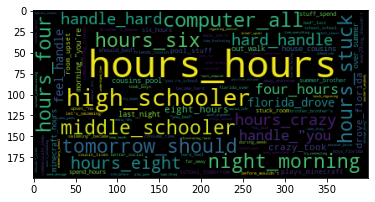

In [22]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))


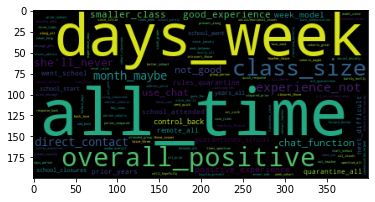

In [23]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))


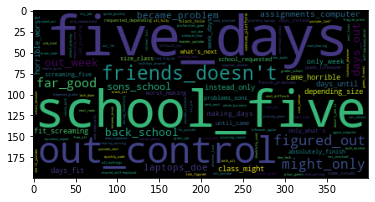

In [24]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))


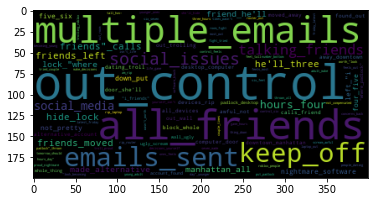

In [25]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))


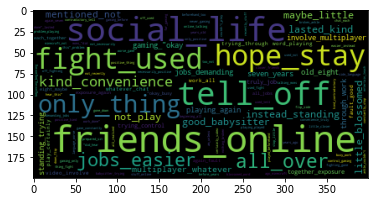

In [26]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))


In [27]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.5041581394999827

[t-SNE] Computing 57 nearest neighbors...
[t-SNE] Indexed 58 samples in 0.001s...
[t-SNE] Computed neighbors for 58 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 58 / 58
[t-SNE] Mean sigma: 0.009563
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.639046
[t-SNE] KL divergence after 1000 iterations: 0.223196


Loading BokehJS ...

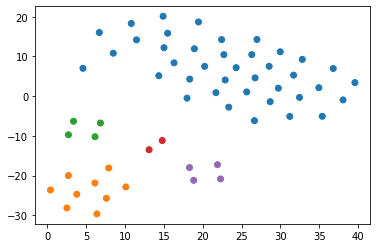

In [28]:
getTopicClusters(lda_model, corpus)

In [29]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.037738 -0.093977       1        1  22.501996
4      0.124812  0.091896       2        1  21.984137
0     -0.015648 -0.063384       3        1  21.700761
2      0.006820  0.007154       4        1  18.349650
3     -0.153722  0.058311       5        1  15.463456, topic_info=                 Term       Freq      Total Category  logprob  loglift
253       hours_hours  12.000000  12.000000  Default  30.0000  30.0000
977          all_time   4.000000   4.000000  Default  29.0000  29.0000
769         five_days   3.000000   3.000000  Default  28.0000  28.0000
591       out_control   4.000000   4.000000  Default  27.0000  27.0000
891         days_week   3.000000   3.000000  Default  26.0000  26.0000
...               ...        ...        ...      ...      ...      ...
591       out_control   2.248862   4.304434   Topic5  -4.9283   1.2175
1835  padlock"_thrown   0.873699   1.352114   Topic5  -5.8737   1.4300
561      social_media   0.941294   1.934712   Topic5  -5.7992   1.1462
1802    account_found   0.873699   1.352114   Topic5  -5.8737   1.4300
1678       hours_four   0.873793   3.018042   Topic5  -5.8736   0.6272

[252 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
1656      3  0.909163            "no_out
1425      2  0.788307         "okay_busy
1657      3  0.909163     "you're_school
1658      3  0.909163          "you_bed"
760       4  1.095000  absolutely_finish
...     ...       ...                ...
922       1  0.598969         week_model
1027      1  0.908037        went_school
784       4  1.095000        what's_next
785       4  1.095000       worst_making
1028      1  0.908037          years_all

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

In [30]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

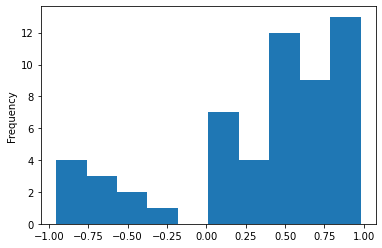

In [31]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

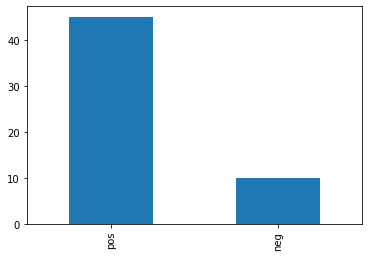

In [32]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Gaming Group2

In [33]:
filename='Data/FocusGroups/TXT_Samples/Gaming_Group2.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [34]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.014*"three_weeks" + 0.009*"video_games" + 0.008*"behavioral_therapy" + 0.008*"started_cognitive" + 0.008*"started_small" + 0.004*"animal_crossing" + 0.003*"same_time" + 0.003*"biggest_concern" + 0.002*"recommended_second" + 0.002*"second_help"'), (1, '0.009*"spend_time" + 0.005*"hours_not" + 0.003*"whatever_put" + 0.003*"ipad_privileges" + 0.003*"roblox_incentive" + 0.003*"real_person" + 0.003*"year\'s_eve" + 0.003*"hanging_out" + 0.003*"not_easy" + 0.002*"three_hours"'), (2, '0.014*"six_weeks" + 0.014*"weeks_sleep-away" + 0.008*"weeks_camp" + 0.006*"weeks_total" + 0.006*"total_max" + 0.006*"sleep-away_six" + 0.006*"max_manage" + 0.006*"eight_weeks" + 0.006*"camp_eight" + 0.006*"sessions_six"'), (3, '0.014*"three_hours" + 0.006*"not_enough" + 0.006*"leave_house" + 0.006*"sending_kid" + 0.006*"time_kids"" + 0.005*"park_three" + 0.005*"feel_better" + 0.005*"makes_feel" + 0.003*"honesty_all" + 0.003*"soul_hear"'), (4, '0.007*"cognitive_behavioral" + 0.006*"podcast_truth" + 0.006*"

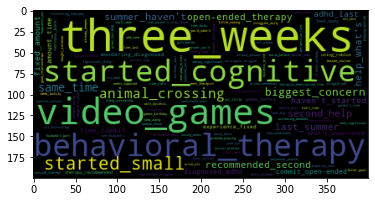

In [35]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))

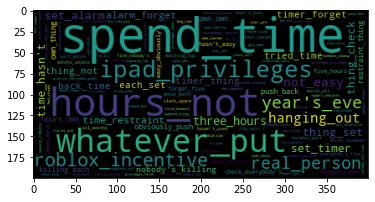

In [36]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))

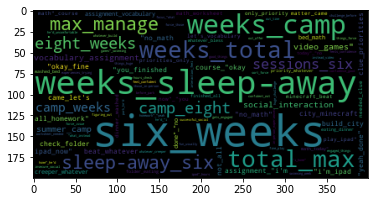

In [37]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))

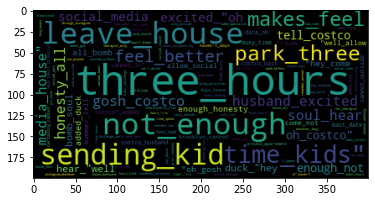

In [38]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))

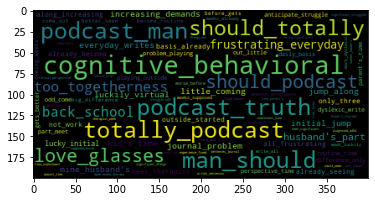

In [39]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))

In [40]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.43967133374205664

[t-SNE] Computing 66 nearest neighbors...
[t-SNE] Indexed 67 samples in 0.000s...
[t-SNE] Computed neighbors for 67 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 67 / 67
[t-SNE] Mean sigma: 0.088710
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.018021
[t-SNE] KL divergence after 1000 iterations: 0.297486


Loading BokehJS ...

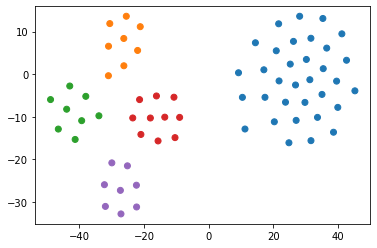

In [41]:
getTopicClusters(lda_model, corpus)

In [42]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.129405 -0.001034       1        1  25.090949
0      0.047591 -0.002916       2        1  22.022932
2     -0.074952 -0.097844       3        1  17.802309
1     -0.030208  0.006037       4        1  17.692565
3     -0.071836  0.095757       5        1  17.391246, topic_info=                  Term      Freq     Total Category  logprob  loglift
1149         six_weeks  4.000000  4.000000  Default  30.0000   30.000
1159  weeks_sleep-away  4.000000  4.000000  Default  29.0000   29.000
741        three_weeks  5.000000  5.000000  Default  28.0000   28.000
1360       three_hours  4.000000  4.000000  Default  27.0000   27.000
830         spend_time  3.000000  3.000000  Default  26.0000   26.000
...                ...       ...       ...      ...      ...      ...
1327       excited_"oh  0.929884  1.405693   Topic5  -5.7087    1.336
1325    enough_honesty  0.929884  1.405693   Topic5  -5.7087    1.336
1326        enough_not  0.929884  1.405693   Topic5  -5.7087    1.336
1324         duck_"hey  0.929884  1.405693   Topic5  -5.7087    1.336
1310         "hey_come  0.929884  1.405693   Topic5  -5.7087    1.336

[284 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
1310      5  0.711393            "hey_come
1065      3  0.933752            "i'm_ipad
1066      3  0.933752             "no_math
1067      3  0.933752            "no_math"
1311      5  0.711393             "oh_gosh
...     ...       ...                  ...
1454      2  0.351712  wondering_diagnosed
1111      3  0.933752     worksheet_needed
1518      1  0.711521         worse_before
1518      2  0.355761         worse_before
838       4  0.722176           year's_eve

[292 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])

In [43]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

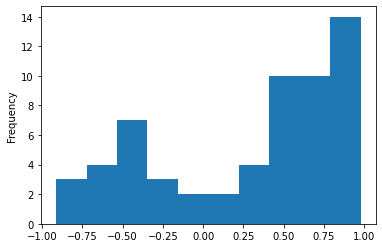

In [44]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

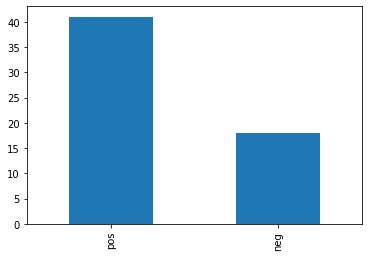

In [45]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Gaming Group3

In [46]:
filename='Data/FocusGroups/TXT_Samples/Gaming_Group3.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [47]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.011*"part_ends" + 0.008*"video_games" + 0.005*"good_thing" + 0.005*"flip_side" + 0.004*"ends_[011804]" + 0.004*"ends_[014118]" + 0.003*"playing_playing" + 0.003*"positive_thing" + 0.003*"figuring_out" + 0.003*"cousins_live"'), (1, '0.009*"spend_time" + 0.009*"town_hall" + 0.006*"time_friends" + 0.006*"wants_spend" + 0.006*"past_months" + 0.006*"once_again" + 0.006*"video_gaming" + 0.006*"gaming_before" + 0.005*"youtube_videos" + 0.004*"video_games"'), (2, '0.005*"video_game" + 0.004*"online_work" + 0.004*"all_time" + 0.004*"conflict_resolution" + 0.004*"strategy_conflict" + 0.004*"gaming_seeing" + 0.004*"different_era" + 0.004*"gaming_cases" + 0.004*"covid_online" + 0.004*"eight-year-old_addicted"'), (3, '0.006*"before_covid" + 0.006*"wide_range" + 0.005*"general_ed" + 0.005*"all_time" + 0.004*"those_things" + 0.004*"all_those" + 0.004*""whoa_not" + 0.004*"classes_teachers" + 0.004*"handing_assignments" + 0.004*"substance_abuse"'), (4, '0.009*"ed_teachers" + 0.005*"figure_out" 

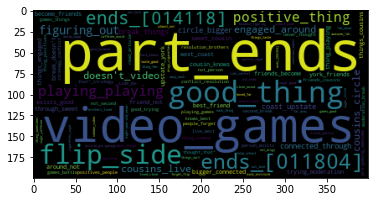

In [48]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))


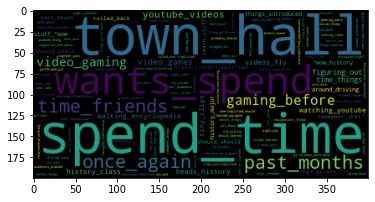

In [49]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))


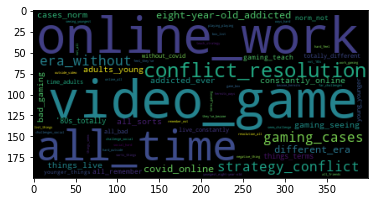

In [50]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))


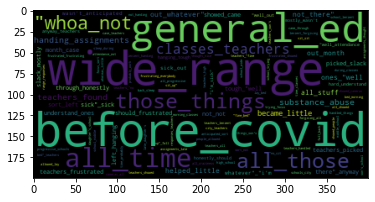

In [51]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))


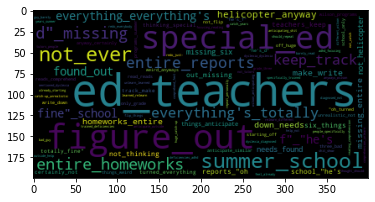

In [52]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))


In [53]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.6031816109198948

[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 0.028587
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.488281
[t-SNE] KL divergence after 1000 iterations: 0.051499


Loading BokehJS ...

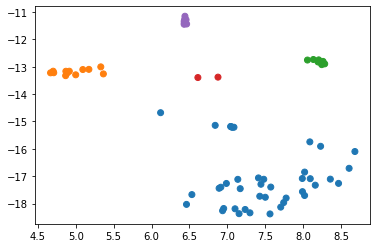

In [54]:
getTopicClusters(lda_model, corpus)

In [55]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.070952  0.121776       1        1  23.693537
1      0.178128  0.011060       2        1  23.240804
0     -0.050964 -0.105805       3        1  21.442449
4     -0.019353  0.016082       4        1  17.974905
2     -0.036860 -0.043112       5        1  13.648306, topic_info=                     Term      Freq     Total Category  logprob  loglift
347             part_ends  4.000000  4.000000  Default  30.0000  30.0000
1329           spend_time  3.000000  3.000000  Default  29.0000  29.0000
1441            town_hall  3.000000  3.000000  Default  28.0000  28.0000
478           ed_teachers  3.000000  3.000000  Default  27.0000  27.0000
73            video_games  4.000000  4.000000  Default  26.0000  26.0000
...                   ...       ...       ...      ...      ...      ...
1041          work_gaming  0.818189  1.225146   Topic5  -5.5698   1.5878
1005           video_game  0.997792  2.031176   Topic5  -5.3714   1.2807
751              all_time  0.879964  3.056064   Topic5  -5.4971   0.7466
1015  conflict_resolution  0.818335  2.076215   Topic5  -5.5697   1.0605
1033    strategy_conflict  0.818335  2.076215   Topic5  -5.5697   1.0605

[271 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
470       4  1.086608                 "he's_d"
471       4  1.086608                 "he's_f"
895       1  0.906153               "i'm_sick"
472       4  1.086608               "oh_turned
896       1  0.906153         "well_attendance
...     ...       ...                      ...
1293      3  0.745591             york_friends
1042      5  0.816229            young_younger
1043      5  0.816229           younger_things
1044      5  0.816229  youngest_eight-year-old
341       2  0.808363           youtube_videos

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 5, 3])

In [56]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

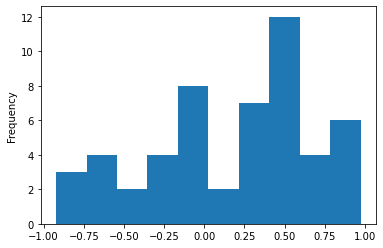

In [57]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

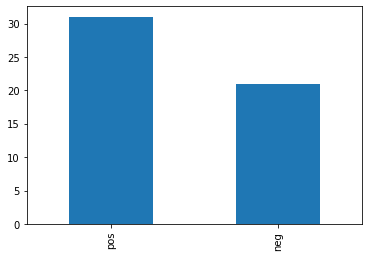

In [58]:
final['comp_score'].value_counts().plot(kind = 'bar')

##### Gaming Group4

In [59]:
filename='Data/FocusGroups/TXT_Samples/Gaming_Group4.txt'
with open(filename, 'r') as file:
    #data = file.read().replace('\n', '')
    lines = file.read().splitlines()
final_lines=preProcessLines(lines) 

In [60]:
bigram_tokens=getLineBigramTokens(final_lines)
# Create Dictionary
id2word = corpora.Dictionary(bigram_tokens)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bigram_tokens]
# Build LDA model
lda_model = getLDAModel(bigram_tokens,id2word,corpus,num_topics)
print(lda_model.print_topics())
#1-Technology use
#2-Going back to normal
#3-Social media
#4-Online Classes

[(0, '0.004*"walk_away" + 0.003*"not_different" + 0.003*"limitations_terms" + 0.003*"maybe_control" + 0.003*"mind_uses" + 0.003*"instructions_whereas" + 0.003*"play_ensure" + 0.003*"read_read" + 0.003*"read_instructions" + 0.003*"forced_read"'), (1, '0.008*"over_hard" + 0.008*"pry_away" + 0.008*"life_times" + 0.008*"lifeblood_over" + 0.008*"out_friends" + 0.008*"hell_pry" + 0.008*"times_whatever" + 0.008*"screen_lifeblood" + 0.008*"hard_road" + 0.008*"road_introduce"'), (2, '0.009*"over_games" + 0.007*"specific_friends" + 0.007*"steps_backwards" + 0.007*"keep_incremental" + 0.007*"little_things" + 0.007*"several_times" + 0.007*"gird_yourself" + 0.007*"times_gird" + 0.007*"things_frustrating" + 0.007*"step-by-step_steps"'), (3, '0.007*"friends_play" + 0.005*"play_game" + 0.004*"people_not" + 0.004*"home_all" + 0.003*"all_time" + 0.003*"mentioned_before" + 0.003*"same_thing" + 0.002*"age"_"but" + 0.002*""it_doesn\'t" + 0.002*""but_why""'), (4, '0.007*"play_games" + 0.006*"same_time" + 0.

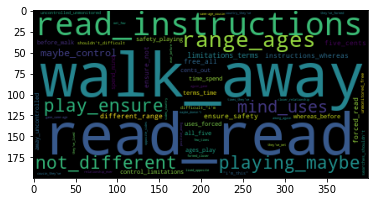

In [61]:
#Topic 0
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 200))))


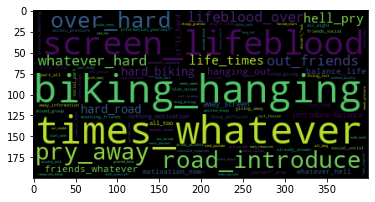

In [62]:
#Topic 1
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(1, 200))))


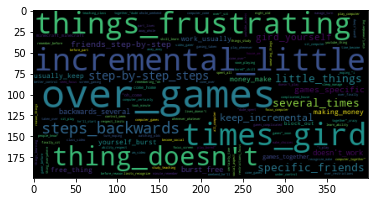

In [63]:
#Topic 2
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(2, 200))))


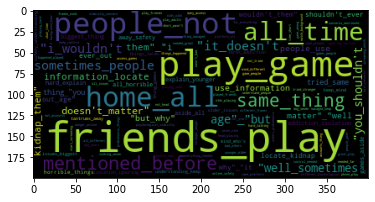

In [64]:
#Topic 3
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(3, 200))))


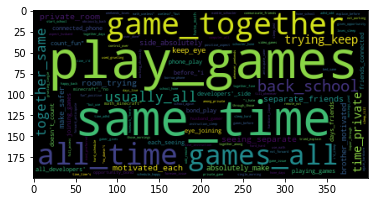

In [65]:
#Topic 4
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(4, 200))))


In [66]:
coherence_model_lda=CoherenceModel(model=lda_model, texts=bigram_tokens, dictionary=id2word, coherence='c_v')
coherence_model_lda.get_coherence()

0.8372482779590105

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 115 samples in 0.000s...
[t-SNE] Computed neighbors for 115 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 115 / 115
[t-SNE] Mean sigma: 0.004734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.259712
[t-SNE] KL divergence after 1000 iterations: 0.039448


Loading BokehJS ...

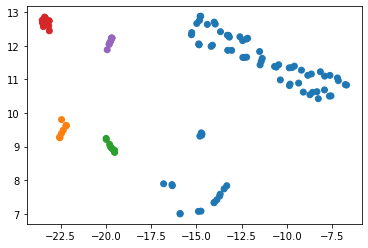

In [67]:
getTopicClusters(lda_model, corpus)

In [68]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.087308 -0.078863       1        1  23.518558
2     -0.126863 -0.046474       2        1  20.958581
4     -0.004341  0.004976       3        1  19.780484
3      0.005271  0.109068       4        1  19.399029
0      0.038626  0.011293       5        1  16.343349, topic_info=                  Term      Freq     Total Category  logprob  loglift
1679        over_games  4.000000  4.000000  Default  30.0000   30.000
2136       hanging_out  4.000000  4.000000  Default  29.0000   29.000
2141        it'll_hard  4.000000  4.000000  Default  28.0000   28.000
2148  screen_lifeblood  4.000000  4.000000  Default  27.0000   27.000
2147    road_introduce  4.000000  4.000000  Default  26.0000   26.000
...                ...       ...       ...      ...      ...      ...
2040        ensure_not  1.301452  1.753816   Topic5  -5.6553    1.513
2041     ensure_safety  1.301452  1.753816   Topic5  -5.6553    1.513
2039   different_range  1.301452  1.753816   Topic5  -5.6553    1.513
2043       forced_read  1.301452  1.753816   Topic5  -5.6553    1.513
2044          free_all  1.301452  1.753816   Topic5  -5.6553    1.513

[253 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2004      3  0.509419        "but_use
1935      4  0.678007       "but_why"
1574      2  0.820864     "dude_spent
1936      4  0.678007     "i_wouldn't
1937      4  0.678007     "it_doesn't
...     ...       ...             ...
2170      2  0.761571    work_usually
1956      4  0.678007  wouldn't_them"
1908      4  0.678019   younger_older
1976      1  0.507675  yourself"_area
2171      2  0.761571  yourself_burst

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

In [69]:
df=pd.DataFrame(final_lines,columns=['final_lines'])
df['clean_text']=df['final_lines'].apply(preprocessText)
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda review: sid.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
final=df.query("compound!=0")
final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)

C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['comp_score'] = final['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_4684/2397249490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['is_positive'] = final['comp_score'].apply(lambda c: 1 if c =='pos' else 0)


<AxesSubplot:ylabel='Frequency'>

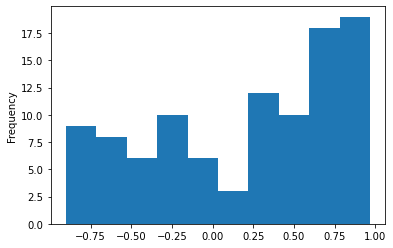

In [70]:
final['compound'].plot(kind = 'hist')

<AxesSubplot:>

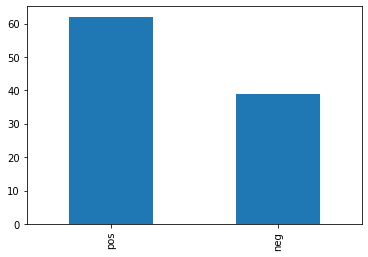

In [71]:
final['comp_score'].value_counts().plot(kind = 'bar')

### Key Observations

In [ ]:
#Key themes
#Gaming Groups 1 - more time at hand,time spent online,social life
#Gaming Groups 2 - experiences,time spent online, covid worries, family life, podcast
#Gaming Groups 3 - Covid worries,more time at hand,time spent online, remembering pre-covid times, remote schooling
#Gaming Groups 4 - Frustration, social life, Online games

In [ ]:
#Sentiment Analysis
#Gaming Groups 1 - very little negative
#Gaming Groups 2 - little negative
#Gaming Groups 3, 4 - Moderately negative